Goal
* Code different types of regularization for linear regression
* Show different variations of the hyper params to gain intuitition

Takeways
* Ridge regression = L2
* Lasso regression = L1
* Elastic Net = L1 + L2, can use a ratio to control whether more L1 or L2

Use
* L1 - When only a few features are important and want to make the model more simple
* L2 - When several features are strongly correlated

Questions
* L2 - why use L2 when there are more features than training samples? Shouldnt it be L1, we want to drop features
* L2 seems to outperform elastic net. Why still use elastic net?
* L2 - how does this help with multicollinearity? From what im seeing it just includes all features, it this a way to solve multicollinearity, include all the features but spread out the weights?

In [1]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [27]:
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

from sklearn import linear_model

%matplotlib inline

Let's produce some fake data. do linear regression on data that represents a quadratic equation

(40,)
(40,)
(40,)


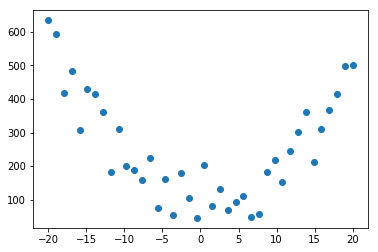

In [3]:
# plot non-linear data points
# fit simple linear regression
# then plot linear regression with polynomial features

x= np.linspace(-20,20, num= 40)
b = np.random.rand(40,) * 200

y = x ** 2 - 2 * x + 10 + b

print(x.shape)
print(y.shape)
print(b.shape)

# plot data points to see relationship

plt.scatter(x,y)

Let's start with ridge regression.

* Ridge regression is adding the L2 regularization to the cost function
* Recall the cost function is mean square error. L2 regularization, is the sum of squared weights

In [4]:

# next do ridge regression with different scaling parameters

# first do linear regression - DONE

model = LinearRegression()
model.fit(x.reshape(40,1),y.reshape(40,1))

y_hat = model.predict(x.reshape(40,1))


# then add regularization


Tip:
* Scaling - regularization is very sensitive to inputs of scale. before we did not scale and regularization did not have any impact

In [5]:
a_list = [0,10,100]
y_hat_list = []

scaler = StandardScaler()
x_norm = scaler.fit(x.reshape(40,1)).transform(x.reshape(40,1))


for a in a_list:

    print(a)
    model = Ridge(a,solver='cholesky')
    model.fit(x_norm,y.reshape(40,1))

    y_hat_list.append(model.predict(x_norm))

0
10
100


-
--
-.


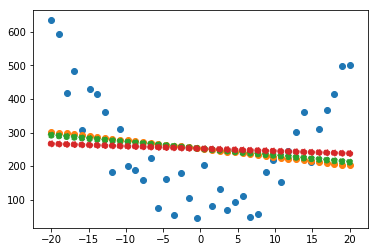

In [6]:
plt.scatter(x,y)

line_style =[ '-' , '--' , '-.' , ':' , 'steps' , '...']

for counter,y_hat in enumerate(y_hat_list):
    print(line_style[counter])
    plt.scatter(x,y_hat.reshape(40,-1),linestyle=line_style[counter])

I think a good way to learn ridge and lasso regression is to compare their performance. Recall
* Ridge use L2 regularization. Sum of squared weights
* Lasso uses L1 regularization. Sum of weights

Ridge main benefits
* It shrinks the weights, keeps many but small. This is good for multicollinearity
* It has a derivative that is a non-constant, so good for gradient descent. Possibly computational faster

Lasso main benefits
* It does feature selection and shrinks weights. It reduces some weights to zero. Remember the feature space is a diamond. This is good for reducing model complexity, possibly better when we have many input features and are not as correlated
* It can't use gradient descent since derivative is a constant

SCENARIO: Many features, not correlated

('x shape', (50, 10))
('w shape', (10,))
('w shape', (50, 10))
('y shape', (50,))
('model coeff', array([ 0.        ,  0.        ,  0.        ,  0.40418674,  0.69674618,
        0.43061646,  0.81716008,  0.8752204 ,  0.83288371,  0.8199814 ]))
('MSE', 3.3134052736917066, 12.609564533493739)


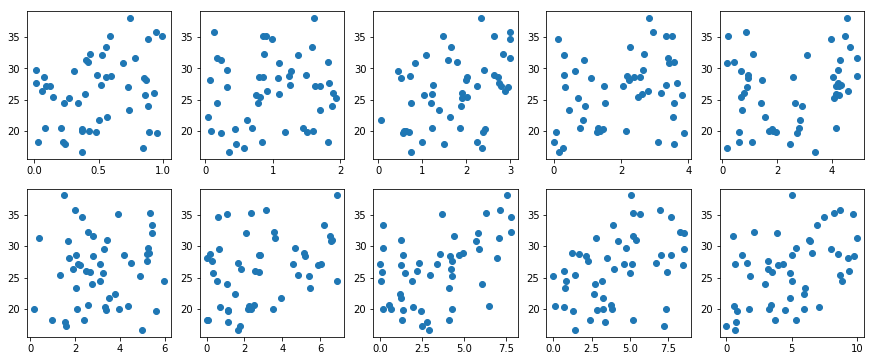

In [17]:
# Test cases

# Many features relative to the number of samples
# Say ratio is 5:1. 5 samples to 1 feature

# Many features, not correlated
# Say the features are decreasing in weights too. So towards the end, the features are less 

n_rows = 50
n_features = 10

x_raw = np.random.rand(n_rows,n_features)
w = np.linspace(1,10,10)

x = x_raw*w

y = np.sum(x,axis=1)

print("x shape",x_raw.shape)
print("w shape",w.shape)
print("w shape",x.shape)
print("y shape",y.shape)

# See the relationships between x and y

# should be roughly linear about a line
# this is actually quite cool to see. can seaborn plot multiple here
# for now primitive

#fig = plt.figure()
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows,ncols, figsize=(15, 6), facecolor='w', edgecolor='k')

axs = axs.ravel()

for x_pos in range(x.shape[1]):

    axs[x_pos-1].scatter(x[:,x_pos-1],y)


# Now do the one that should have better performance
# We should reduce features here since they are not correlated

# Perform standardization here

scale = StandardScaler().fit(x)
x_norm = scale.transform(x)
#fig = plt.figure()
#plt.boxplot(np.mean(x_norm,axis=1))
#fig = plt.figure()
#plt.boxplot(np.mean(x,axis=1))

# Lasso regression
alpha = 1
model = Lasso(alpha)
model.fit(x,y)

# Print coefficients of model
# this is really good. Can see the lasso regression is dropping coefficients
print("model coeff",model.coef_)

# Performance metrics, only a 4% error which is really good
print("MSE",mean_squared_error(y,model.predict(x)),mean_squared_error(y,model.predict(x))/np.mean(y)*100)


('x shape', (50, 10))
('w shape', (10,))
('w shape', (50, 10))
('y shape', (50,))
('model coeff', array([ 0.72804974,  0.94534215,  0.94120277,  0.97514256,  1.00061407,
        0.99071781,  0.98191025,  0.98633237,  0.98911005,  0.9941025 ]))
('MSE', 0.0077140471400745456, 0.02994314515088551)


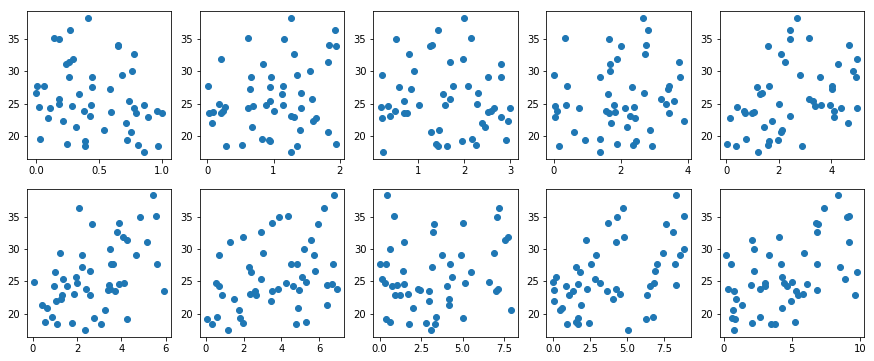

In [18]:
# Test cases

# Many features relative to the number of samples
# Say ratio is 5:1. 5 samples to 1 feature

# Many features, not correlated
# Say the features are decreasing in weights too. So towards the end, the features are less 

n_rows = 50
n_features = 10

x_raw = np.random.rand(n_rows,n_features)
w = np.linspace(1,10,10)

x = x_raw*w

y = np.sum(x,axis=1)

print("x shape",x_raw.shape)
print("w shape",w.shape)
print("w shape",x.shape)
print("y shape",y.shape)

# See the relationships between x and y

# should be roughly linear about a line
# this is actually quite cool to see. can seaborn plot multiple here
# for now primitive

#fig = plt.figure()
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows,ncols, figsize=(15, 6), facecolor='w', edgecolor='k')

axs = axs.ravel()

for x_pos in range(x.shape[1]):

    axs[x_pos-1].scatter(x[:,x_pos-1],y)


# Now do the one that should have better performance
# We should reduce features here since they are not correlated

# Perform standardization here

scale = StandardScaler().fit(x)
x_norm = scale.transform(x)
#fig = plt.figure()
#plt.boxplot(np.mean(x_norm,axis=1))
#fig = plt.figure()
#plt.boxplot(np.mean(x,axis=1))

# Lasso regression
alpha = 1
model = Ridge(alpha)
model.fit(x,y)

# Print coefficients of model
# this is really good. Can see the lasso regression is dropping coefficients
print("model coeff",model.coef_)

# Performance metrics, only a 4% error which is really good
print("MSE",mean_squared_error(y,model.predict(x)),mean_squared_error(y,model.predict(x))/np.mean(y)*100)


Interesting. 
* Lasso regression produces a simpler model. Can see that it's dropping the correct features
* Ridge regression produces a more accurate model. it's true that those features should be included.

When will Lasso regression outperform Ridge? Im not sure it will but it does produce a simpler model which may have its benefits.

I believe ridge will always outperform. It just has more features or no loss of info. but does increase complexity of the model.

SCENARIO: Many features, correlated


('x sample row', array([ 0.69603756,  0.77337507,  0.85071258,  0.92805008,  1.00538759,
        1.0827251 ,  1.16006261,  1.23740011,  1.31473762,  1.39207513]))
('x shape', (50, 1))
('w shape', (10,))
('w shape', (50, 10))
('y shape', (50,))
('model coeff', array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  4.53367323]))
('MSE', 2.9663267683249215, 38.796747667638201)


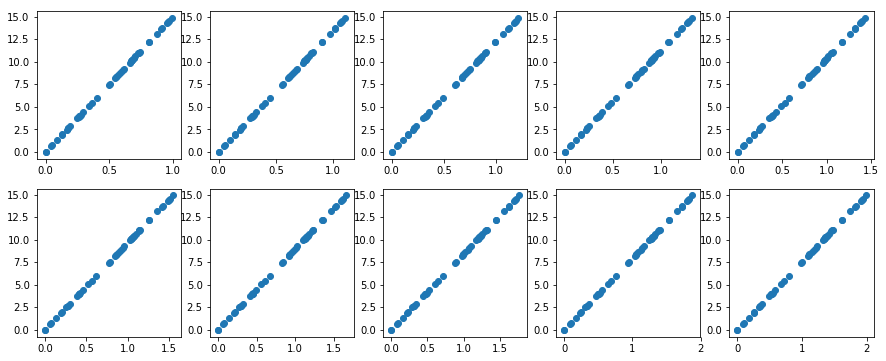

In [25]:
# Many features, correlated

# See performance of each type of regression

# Test cases

# Many features relative to the number of samples
# Say ratio is 5:1. 5 samples to 1 feature

# Many features, not correlated
# Say the features are decreasing in weights too. So towards the end, the features are less 

n_rows = 50
n_features = 10

x_raw = np.random.rand(n_rows,1)
w = np.linspace(1,2,10)
x = x_raw

for feat in range(n_features-1):
    x = np.concatenate((x,x_raw*w[feat+1]),axis = 1)

print("x sample row",x[0])
    
y = np.sum(x,axis=1)

print("x shape",x_raw.shape)
print("w shape",w.shape)
print("w shape",x.shape)
print("y shape",y.shape)

# See the relationships between x and y

# should be roughly linear about a line
# this is actually quite cool to see. can seaborn plot multiple here
# for now primitive

#fig = plt.figure()
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows,ncols, figsize=(15, 6), facecolor='w', edgecolor='k')

axs = axs.ravel()

for x_pos in range(x.shape[1]):

    axs[x_pos-1].scatter(x[:,x_pos-1],y)


# Now do the one that should have better performance
# We should reduce features here since they are not correlated

# Perform standardization here

scale = StandardScaler().fit(x)
x_norm = scale.transform(x)
#fig = plt.figure()
#plt.boxplot(np.mean(x_norm,axis=1))
#fig = plt.figure()
#plt.boxplot(np.mean(x,axis=1))

# Lasso regression
alpha = 1
model = Lasso(alpha)
model.fit(x,y)

# Print coefficients of model
# this is really good. Can see the lasso regression is dropping coefficients
print("model coeff",model.coef_)

# Performance metrics, only a 4% error which is really good
print("MSE",mean_squared_error(y,model.predict(x)),mean_squared_error(y,model.predict(x))/np.mean(y)*100)


('x sample row', array([ 0.6132878 ,  0.68143089,  0.74957398,  0.81771706,  0.88586015,
        0.95400324,  1.02214633,  1.09028942,  1.15843251,  1.2265756 ]))
('x shape', (50, 1))
('w shape', (10,))
('w shape', (50, 10))
('y shape', (50,))
('model coeff', array([ 0.6314402 ,  0.70160023,  0.77176025,  0.84192027,  0.91208029,
        0.98224032,  1.05240034,  1.12256036,  1.19272038,  1.26288041]))
('MSE', 0.0018875248242138513, 0.024783003197961805)


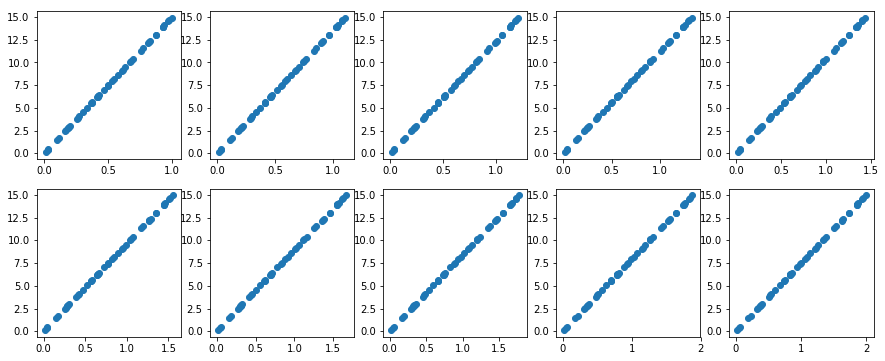

In [24]:
# Many features, correlated

# See performance of each type of regression

# Test cases

# Many features relative to the number of samples
# Say ratio is 5:1. 5 samples to 1 feature

# Many features, not correlated
# Say the features are decreasing in weights too. So towards the end, the features are less 

n_rows = 50
n_features = 10

x_raw = np.random.rand(n_rows,1)
w = np.linspace(1,2,10)
x = x_raw

for feat in range(n_features-1):
    x = np.concatenate((x,x_raw*w[feat+1]),axis = 1)

print("x sample row",x[0])
    
y = np.sum(x,axis=1)

print("x shape",x_raw.shape)
print("w shape",w.shape)
print("w shape",x.shape)
print("y shape",y.shape)

# See the relationships between x and y

# should be roughly linear about a line
# this is actually quite cool to see. can seaborn plot multiple here
# for now primitive

#fig = plt.figure()
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows,ncols, figsize=(15, 6), facecolor='w', edgecolor='k')

axs = axs.ravel()

for x_pos in range(x.shape[1]):

    axs[x_pos-1].scatter(x[:,x_pos-1],y)


# Now do the one that should have better performance
# We should reduce features here since they are not correlated

# Perform standardization here

scale = StandardScaler().fit(x)
x_norm = scale.transform(x)
#fig = plt.figure()
#plt.boxplot(np.mean(x_norm,axis=1))
#fig = plt.figure()
#plt.boxplot(np.mean(x,axis=1))

# Lasso regression
alpha = 1
model = Ridge(alpha)
model.fit(x,y)

# Print coefficients of model
# this is really good. Can see the lasso regression is dropping coefficients
print("model coeff",model.coef_)

# Performance metrics, only a 4% error which is really good
print("MSE",mean_squared_error(y,model.predict(x)),mean_squared_error(y,model.predict(x))/np.mean(y)*100)


Can clearly see that ridge outperforms when this is multi-collinear features. Question is why can we explain this?

Let's see elastic net and see what happens here

('x sample row', array([ 0.43895096,  0.48772329,  0.53649562,  0.58526795,  0.63404028,
        0.68281261,  0.73158494,  0.78035726,  0.82912959,  0.87790192]))
('x shape', (50, 1))
('w shape', (10,))
('w shape', (50, 10))
('y shape', (50,))
('model coeff', array([ 0.48418872,  0.54384751,  0.60350506,  0.66315424,  0.72278631,
        0.78239683,  0.84199438,  0.90160292,  0.96124736,  1.02092782]))
('MSE', 0.80695777713842942, 10.522995563501444)


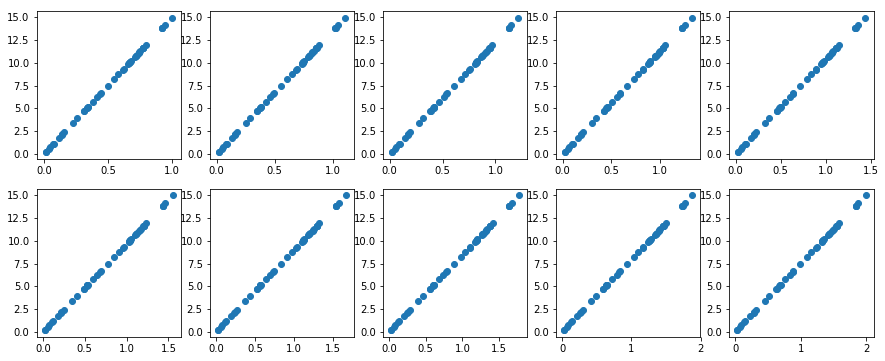

In [36]:
# Many features, correlated

# See performance of each type of regression

# Test cases

# Many features relative to the number of samples
# Say ratio is 5:1. 5 samples to 1 feature

# Many features, not correlated
# Say the features are decreasing in weights too. So towards the end, the features are less 

n_rows = 50
n_features = 10

x_raw = np.random.rand(n_rows,1)
w = np.linspace(1,2,10)
x = x_raw

for feat in range(n_features-1):
    x = np.concatenate((x,x_raw*w[feat+1]),axis = 1)

print("x sample row",x[0])
    
y = np.sum(x,axis=1)

print("x shape",x_raw.shape)
print("w shape",w.shape)
print("w shape",x.shape)
print("y shape",y.shape)

# See the relationships between x and y

# should be roughly linear about a line
# this is actually quite cool to see. can seaborn plot multiple here
# for now primitive

#fig = plt.figure()
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows,ncols, figsize=(15, 6), facecolor='w', edgecolor='k')

axs = axs.ravel()

for x_pos in range(x.shape[1]):

    axs[x_pos-1].scatter(x[:,x_pos-1],y)


# Now do the one that should have better performance
# We should reduce features here since they are not correlated

# Perform standardization here

scale = StandardScaler().fit(x)
x_norm = scale.transform(x)
#fig = plt.figure()
#plt.boxplot(np.mean(x_norm,axis=1))
#fig = plt.figure()
#plt.boxplot(np.mean(x,axis=1))

# Elasticnet regression
alpha = 0.5

# Although not sure if it improves it
model = ElasticNet(alpha,l1_ratio = 0.05)
model.fit(x,y)

# Print coefficients of model
# this is really good. Can see the lasso regression is dropping coefficients
print("model coeff",model.coef_)

# Performance metrics, only a 4% error which is really good
print("MSE",mean_squared_error(y,model.predict(x)),mean_squared_error(y,model.predict(x))/np.mean(y)*100)
